In [229]:
#import all
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
nltk.download(['punkt','wordnet','stopwords'])
import re

from wordcloud import WordCloud
import spacy.cli
spacy.cli.download("fr_core_news_md")
nlp = spacy.load('fr_core_news_md')

from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow_docs as tfdocs

from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler    
from sklearn.metrics import confusion_matrix


import tensorflow_docs.modeling
from keras.layers import Dense

import tensorflow as tf
tf.__version__
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

from sklearn import preprocessing

import tensorflow_docs.plots

from datetime import datetime

from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [192]:
#import CSV
df = pd.read_csv('allocine_forrest_avis.csv')
pd.reset_option("max_colwidth")
print(df.iloc[2])
df.head()

Note                                                             5,0
Description        Le matin, quand il fait bon et beau, normal qu...
Date                                      Publiée le 18 juillet 2014
nombre_good_bad    39\n        \n\n    \n\n    \n    \n          ...
nombre_follow                                    Suivre son activité
key                                                                2
Name: 2, dtype: object


,Note,Description,Date,nombre_good_bad,nombre_follow,key
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...,Suivre son activité,0
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...,Suivre son activité,1
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...,Suivre son activité,2
3,"5,0","Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...,Suivre son activité,3
4,"5,0",Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...,Suivre son activité,4


In [193]:
#DROP duplicate
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Note             2009 non-null   object
 1   Description      2009 non-null   object
 2   Date             2009 non-null   object
 3   nombre_good_bad  2009 non-null   object
 4   nombre_follow    2009 non-null   object
 5   key              2009 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 109.9+ KB


In [194]:
df.describe()

,key
count,2009.000000
mean,6.698855
std,4.172620
min,0.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,14.000000


In [195]:
#Remove space 
df["nombre_good_bad"] = df["nombre_good_bad"].apply(lambda n: " ".join(n.split()))
df["nombre_good"] = df["nombre_good_bad"].apply(lambda g : int(g.split(" ")[0]))
df["nombre_bad"] = df["nombre_good_bad"].apply(lambda g : int(g.split(" ")[1]))

In [196]:
df['nombre_follow'].value_counts()

Suivre son activité    2009
Name: nombre_follow, dtype: int64

In [197]:
df.pop("nombre_good_bad")
df.pop('nombre_follow')

0       Suivre son activité
1       Suivre son activité
2       Suivre son activité
3       Suivre son activité
4       Suivre son activité
               ...         
2004    Suivre son activité
2005    Suivre son activité
2006    Suivre son activité
2007    Suivre son activité
2008    Suivre son activité
Name: nombre_follow, Length: 2009, dtype: object

In [198]:
#convert time to datetime
import dateparser 

df["Date"] = df["Date"].apply(lambda d : d.replace("Publiée le ", ""))
df["Date"] = df["Date"].apply(lambda d : datetime.timestamp(datetime(
    year=dateparser.parse(d).date().year, 
    month=dateparser.parse(d).date().month,
    day=dateparser.parse(d).date().day,
)))
df.head()

,Note,Description,Date,key,nombre_good,nombre_bad
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,1.365379e+09,0,155,10
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,1.564013e+09,1,42,3
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",1.405642e+09,2,39,4
3,"5,0","Un film immense, rempli de poésie et de bons s...",1.276387e+09,3,46,5
4,"5,0",Un très grand film . Ce film suit la vie sur p...,1.408320e+09,4,28,3


In [199]:
df.head()

,Note,Description,Date,key,nombre_good,nombre_bad
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,1.365379e+09,0,155,10
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,1.564013e+09,1,42,3
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",1.405642e+09,2,39,4
3,"5,0","Un film immense, rempli de poésie et de bons s...",1.276387e+09,3,46,5
4,"5,0",Un très grand film . Ce film suit la vie sur p...,1.408320e+09,4,28,3


In [1]:
df['Note'].hist()

NameError: name 'df' is not defined

In [201]:
df["nombre_good"].value_counts()

0      1639
1       230
2        61
3        30
4        11
7         8
5         5
8         4
6         3
12        2
9         2
10        1
11        1
14        1
16        1
17        1
19        1
23        1
27        1
28        1
39        1
42        1
46        1
51        1
155       1
Name: nombre_good, dtype: int64

In [202]:
df["nombre_bad"].value_counts()

0      1748
1       147
2        41
3        19
4        13
5         7
6         4
11        2
20        2
15        2
10        2
9         2
8         2
58        1
86        1
85        1
126       1
78        1
71        1
67        1
61        1
18        1
48        1
47        1
36        1
29        1
26        1
13        1
12        1
7         1
135       1
Name: nombre_bad, dtype: int64

In [203]:
df["Date"].value_counts()

1.159488e+09    63
1.352246e+09     9
1.378339e+09     9
1.352333e+09     8
1.352506e+09     6
                ..
1.330301e+09     1
1.415059e+09     1
1.180742e+09     1
1.246234e+09     1
1.365638e+09     1
Name: Date, Length: 1484, dtype: int64

In [204]:
df["Note"] = df["Note"].apply(lambda n: n.replace(",", "."))
df["binary_note"] = df["Note"].apply(lambda n : 0 if float(n) < 4.5 else 1 )
df.head()
df["binary_note"].value_counts()

1    1667
0     342
Name: binary_note, dtype: int64

In [205]:
df['word_count'] = df["Description"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["Description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["Description"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,Note,Description,Date,key,nombre_good,nombre_bad,binary_note,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,1.365379e+09,0,155,10,1,392,1774,25,4.525510,15.680000
1,4.5,Une immense rèussite du cinèma hollywoodien! R...,1.564013e+09,1,42,3,1,195,1075,11,5.512821,17.727273
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",1.405642e+09,2,39,4,1,1027,4680,54,4.556962,19.018519
3,5.0,"Un film immense, rempli de poésie et de bons s...",1.276387e+09,3,46,5,1,82,419,6,5.109756,13.666667
4,5.0,Un très grand film . Ce film suit la vie sur p...,1.408320e+09,4,28,3,1,623,2569,32,4.123596,19.468750


In [206]:
# on supprime la ponctuation et les chiffres
df['Description'] = df['Description'].map(lambda x : re.sub('[,\.!?]', '', x))\
.map(lambda x : re.sub('\d', '', x))
print(df['Description'].iloc[1])

Une immense rèussite du cinèma hollywoodien Robert Zemeckis implique son hèros imaginaire du nom de Forrest Gump dans tous les grands èvènements sur trente ans d'histoire amèricaine de  à  et l'intègre même dans des documents d'archives dètournès et ètonnants en lui faisant rencontrer des cèlèbritès anciennes Avec les dèbuts d'Elvis Presley la guerre du Vietnam et même la contre-culture du Peace And Love Tom Hanks est à tout jamais Forrest Gump magnifique et inoubliable prestation qui lui vaudra un second Oscar du meilleur acteur Hèros de guerre joueur prodigieux de ping-pong milliardaire grâce au commerce de la crevette inspirant le King ou Lennon pour son "Imagine" se retrouvant même dans le scandale du Watergateon peut dire que son personnage en a vu du pays C'est aussi une ode au bonheur prodigieuse et une fresque historique comme les aime les amèricains marquèe par une bande sonore extraordinaire ("Sweet Home Alabama" de Lynrd Skynard "Mrs Robinson" de Simon & Garfunkel "Everybody

In [207]:
#2) Tokenization
df['Description'] = df.apply(lambda row: word_tokenize(row['Description']), axis=1)
print(df['Description'].iloc[1])

['Une', 'immense', 'rèussite', 'du', 'cinèma', 'hollywoodien', 'Robert', 'Zemeckis', 'implique', 'son', 'hèros', 'imaginaire', 'du', 'nom', 'de', 'Forrest', 'Gump', 'dans', 'tous', 'les', 'grands', 'èvènements', 'sur', 'trente', 'ans', "d'histoire", 'amèricaine', 'de', 'à', 'et', "l'intègre", 'même', 'dans', 'des', 'documents', "d'archives", 'dètournès', 'et', 'ètonnants', 'en', 'lui', 'faisant', 'rencontrer', 'des', 'cèlèbritès', 'anciennes', 'Avec', 'les', 'dèbuts', "d'Elvis", 'Presley', 'la', 'guerre', 'du', 'Vietnam', 'et', 'même', 'la', 'contre-culture', 'du', 'Peace', 'And', 'Love', 'Tom', 'Hanks', 'est', 'à', 'tout', 'jamais', 'Forrest', 'Gump', 'magnifique', 'et', 'inoubliable', 'prestation', 'qui', 'lui', 'vaudra', 'un', 'second', 'Oscar', 'du', 'meilleur', 'acteur', 'Hèros', 'de', 'guerre', 'joueur', 'prodigieux', 'de', 'ping-pong', 'milliardaire', 'grâce', 'au', 'commerce', 'de', 'la', 'crevette', 'inspirant', 'le', 'King', 'ou', 'Lennon', 'pour', 'son', '``', 'Imagine', "''

In [208]:
#3)  on supprime les stop-words
french_stopwords = stopwords.words('french')
df['Description'] = df.Description.apply(lambda x: [item for item in x if item not in french_stopwords])
print(df['Description'].iloc[1])

['Une', 'immense', 'rèussite', 'cinèma', 'hollywoodien', 'Robert', 'Zemeckis', 'implique', 'hèros', 'imaginaire', 'nom', 'Forrest', 'Gump', 'tous', 'grands', 'èvènements', 'trente', 'ans', "d'histoire", 'amèricaine', "l'intègre", 'documents', "d'archives", 'dètournès', 'ètonnants', 'faisant', 'rencontrer', 'cèlèbritès', 'anciennes', 'Avec', 'dèbuts', "d'Elvis", 'Presley', 'guerre', 'Vietnam', 'contre-culture', 'Peace', 'And', 'Love', 'Tom', 'Hanks', 'tout', 'jamais', 'Forrest', 'Gump', 'magnifique', 'inoubliable', 'prestation', 'vaudra', 'second', 'Oscar', 'meilleur', 'acteur', 'Hèros', 'guerre', 'joueur', 'prodigieux', 'ping-pong', 'milliardaire', 'grâce', 'commerce', 'crevette', 'inspirant', 'King', 'Lennon', '``', 'Imagine', "''", 'retrouvant', 'scandale', 'Watergateon', 'peut', 'dire', 'personnage', 'a', 'vu', 'pays', "C'est", 'aussi', 'ode', 'bonheur', 'prodigieuse', 'fresque', 'historique', 'comme', 'aime', 'amèricains', 'marquèe', 'bande', 'sonore', 'extraordinaire', '(', '``', 

In [209]:
#4) Stemming
stemmer = SnowballStemmer('french')
df['Description'] = df.Description.apply(lambda x: [stemmer.stem(item) for item in x])
print(df.iloc[1])

Note                                                                 4.5
Description            [une, immens, rèussit, cinem, hollywoodien, ro...
Date                                                        1564012800.0
key                                                                    1
nombre_good                                                           42
nombre_bad                                                             3
binary_note                                                            1
word_count                                                           195
char_count                                                          1075
sentence_count                                                        11
avg_word_length                                                 5.512821
avg_sentence_lenght                                            17.727273
Name: 1, dtype: object


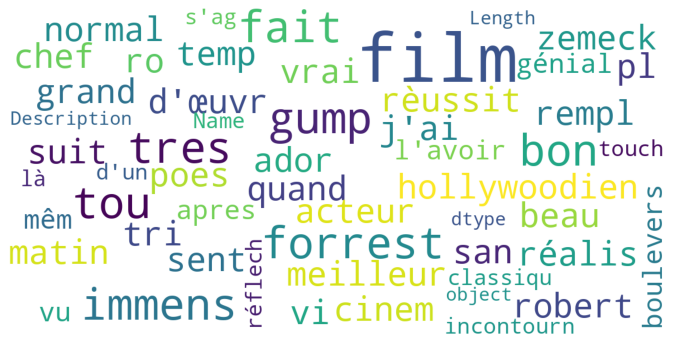

In [210]:
#5) On génère un worcloud pour les 100 mots les plus fréquents
cloud = df

from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations = False,
        background_color='white',
        stopwords=french_stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Description'])

In [211]:
df_word_count = df.copy()
notes = df.pop("binary_note")


In [212]:
df.pop("Description")
df.pop("Note")

0       5.0
1       4.5
2       5.0
3       5.0
4       5.0
       ... 
2004    5.0
2005    5.0
2006    5.0
2007    4.0
2008    5.0
Name: Note, Length: 2009, dtype: object

In [213]:
df

,Date,key,nombre_good,nombre_bad,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,1.365379e+09,0,155,10,392,1774,25,4.525510,15.680000
1,1.564013e+09,1,42,3,195,1075,11,5.512821,17.727273
2,1.405642e+09,2,39,4,1027,4680,54,4.556962,19.018519
3,1.276387e+09,3,46,5,82,419,6,5.109756,13.666667
4,1.408320e+09,4,28,3,623,2569,32,4.123596,19.468750
...,...,...,...,...,...,...,...,...,...
2004,1.396742e+09,9,0,0,29,141,1,4.862069,29.000000
2005,1.407197e+09,10,0,0,32,148,2,4.625000,16.000000
2006,1.410826e+09,11,0,0,17,89,2,5.235294,8.500000
2007,1.422230e+09,12,0,0,11,51,2,4.636364,5.500000


In [214]:
EPOCHS = 200
REPORTSTEP = 50
DOTS = 1

# Split Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(df, notes, test_size=0.33)  

# normalize 
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)    
X_test = scaler.fit_transform(X_test)    

model = Sequential([layers.Dense(32, activation='tanh', input_shape=[len(df.keys())]),
                        layers.Dropout(rate=.1),
                        layers.Dense(64, activation='tanh'),
                        layers.Dropout(rate=.1),
                        layers.Dense(16, activation='tanh'),
                        layers.Dropout(rate=.1),
                        layers.Dense(1, activation='sigmoid')
                        ])
optimizer = tf.keras.optimizers.Adam(0.01)

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Train the Model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=100, shuffle=True, verbose = 0,callbacks=[tfdocs.modeling. EpochDots (report_every=REPORTSTEP)])

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(); print(model.metrics_names); print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Confusion Matrix
y_pred = model.predict(X_test); y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred); print("\nMatrice de confusion:\n", cm.astype('float')/cm.sum(axis=1)[:, np.newaxis])

# More on the Model
print(model.summary())


Epoch: 0, accuracy:0.7868,  loss:0.5065,  
..................................................
Epoch: 50, accuracy:0.8522,  loss:0.3966,  
..................................................
Epoch: 100, accuracy:0.8618,  loss:0.3888,  
..................................................
Epoch: 150, accuracy:0.8626,  loss:0.3878,  
21/21 [==============================] - 0s 914us/step - loss: 0.4435 - accuracy: 0.8431

['loss', 'accuracy']
[0.4435400366783142, 0.843137264251709]

accuracy: 84.31%

Confusion Matrix:
 [[0.19444444 0.80555556]
 [0.03063063 0.96936937]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (De

In [217]:
word_count = df_word_count.pop("word_count")

KeyError: 'word_count'

In [219]:
df_word_count.pop("Description")

0       [forrest, gump, robert, zemeck, (, réalis, tri...
1       [une, immens, rèussit, cinem, hollywoodien, ro...
2       [le, matin, quand, fait, bon, beau, normal, qu...
3       [un, film, immens, rempl, poes, bon, sent, san...
4       [un, tres, grand, film, ce, film, suit, vi, pl...
                              ...                        
2004    [ce, film, chef, d'œuvr, j'ai, ador, vrai, tou...
2005    [meilleur, film, tous, temp, acteur, génial, c...
2006    [ce, film, boulevers, mêm, apres, l'avoir, vu,...
2007     [ce, film, classiqu, tres, touch, fait, réflech]
2008    [il, s'ag, là, d'un, incontourn, forrest, gump...
Name: Description, Length: 2009, dtype: object

In [224]:
df_word_count

,Note,Date,key,nombre_good,nombre_bad,binary_note,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,5.0,1.365379e+09,0,155,10,1,1774,25,4.525510,15.680000
1,4.5,1.564013e+09,1,42,3,1,1075,11,5.512821,17.727273
2,5.0,1.405642e+09,2,39,4,1,4680,54,4.556962,19.018519
3,5.0,1.276387e+09,3,46,5,1,419,6,5.109756,13.666667
4,5.0,1.408320e+09,4,28,3,1,2569,32,4.123596,19.468750
...,...,...,...,...,...,...,...,...,...,...
2004,5.0,1.396742e+09,9,0,0,1,141,1,4.862069,29.000000
2005,5.0,1.407197e+09,10,0,0,1,148,2,4.625000,16.000000
2006,5.0,1.410826e+09,11,0,0,1,89,2,5.235294,8.500000
2007,4.0,1.422230e+09,12,0,0,0,51,2,4.636364,5.500000


In [234]:
linear_regressor_1 = LinearRegression()
linear_regressor_1.fit(df_word_count, word_count)
y1_pred = linear_regressor_1.predict(df_word_count)
beta1_0 = linear_regressor_1.intercept_
beta1_1 = linear_regressor_1.coef_
linear_regressor_1.score(df_word_count, word_count)

0.9945986891679065